# Introdução ao Pandas DataFrame

O **DataFrame** é considerado por muitos como o principal objeto do módulo Pandas. Ele pode ser visto como uma matriz com linhas e colunas rotuladas ou simplesmente como um conjunto de Series. Cada coluna de um DataFrame pode ser retornado como uma Series.

Para mais informações sobre o objeto **DataFrame** do Pandas clique [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

O código fonte do objeto DataFrame está disponível no Github. Quem tiver curiosidade pode visualizar clicando [aqui](https://github.com/pandas-dev/pandas/blob/v0.24.2/pandas/core/frame.py).

In [1]:
# Importando os módulos
import numpy as np
import pandas as pd

In [2]:
linhas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
colunas = ["A", "B", "C", "D", "E"]
np.random.seed(1)
dados = np.random.randint(0,100,(10,5))
df = pd.DataFrame(dados, linhas, colunas)
df

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# Informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int32
 1   B       10 non-null     int32
 2   C       10 non-null     int32
 3   D       10 non-null     int32
 4   E       10 non-null     int32
dtypes: int32(5)
memory usage: 280.0 bytes


In [5]:
# Medidas estatísticas do DataFrame
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,35.800000,45.500000,45.100000,45.300000,45.000000
std,28.785799,37.880661,36.354581,27.912761,31.742016
min,5.000000,1.000000,0.000000,9.000000,1.000000
25%,11.750000,12.500000,7.750000,18.250000,21.250000
50%,29.500000,44.500000,56.500000,53.500000,39.000000
75%,52.000000,77.000000,70.000000,66.250000,74.250000
max,87.000000,94.000000,96.000000,86.000000,87.000000


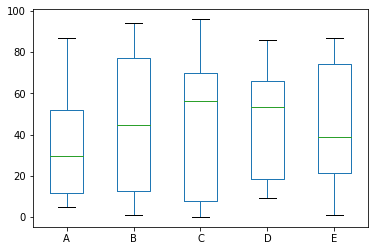

In [6]:
# Plotagem de gráficos
%matplotlib inline
df.plot.box()

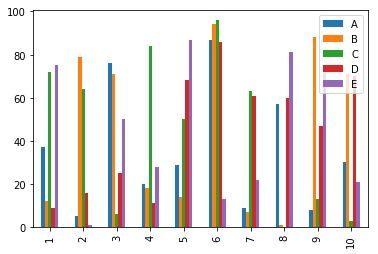

In [7]:
df.plot.bar()

In [8]:
# Selecionar uma coluna
df["A"]

1     37
2      5
3     76
4     20
5     29
6     87
7      9
8     57
9      8
10    30
Name: A, dtype: int32

In [9]:
df["B"]

1     12
2     79
3     71
4     18
5     14
6     94
7      7
8      1
9     88
10    71
Name: B, dtype: int32

In [10]:
type(df["B"])

pandas.core.series.Series

In [11]:
# Selecionando múltiplas colunas
df[["C", "D", "E"]]

,C,D,E
1,72,9,75
2,64,16,1
3,6,25,50
4,84,11,28
5,50,68,87
6,96,86,13
7,63,61,22
8,0,60,81
9,13,47,72
10,3,70,21


In [12]:
# Notação alternativa para seleção de colunas através do ponto (.)
df.B

1     12
2     79
3     71
4     18
5     14
6     94
7      7
8      1
9     88
10    71
Name: B, dtype: int32

In [13]:
# Inclusão de colunas
df["Total"] = df.A + df.B + df.C + df.D + df.E
df

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [8]:
# Somatório de cada coluna
df.sum()


A    358
B    455
C    451
D    453
E    450
dtype: int64

In [9]:
type(df.sum())

pandas.core.series.Series

In [15]:
# Média aritmética de cada coluna
df.mean()

A         35.8
B         45.5
C         45.1
D         45.3
E         45.0
Total    216.7
dtype: float64

In [16]:
# Adicionando um nova linha com o somatório
tot_coluna = pd.DataFrame(np.array(df.sum()).reshape(1,6), index=['Total'], columns=df.columns)
tot_coluna

,A,B,C,D,E,Total
Total,358,455,451,453,450,2167


In [17]:
# Concatenando o DataFrame tot_coluna com o DataFrame df
df2 = df.append(tot_coluna)
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [18]:
# Outra forma de inserir uma nova linha seria ignorar os rótulos (índices) das linhas
df3 = df2.append(df.mean(), ignore_index = True)
df3

,A,B,C,D,E,Total
0,37.0,12.0,72.0,9.0,75.0,205.0
1,5.0,79.0,64.0,16.0,1.0,165.0
2,76.0,71.0,6.0,25.0,50.0,228.0
3,20.0,18.0,84.0,11.0,28.0,161.0
4,29.0,14.0,50.0,68.0,87.0,248.0
5,87.0,94.0,96.0,86.0,13.0,376.0
6,9.0,7.0,63.0,61.0,22.0,162.0
7,57.0,1.0,0.0,60.0,81.0,199.0
8,8.0,88.0,13.0,47.0,72.0,228.0
9,30.0,71.0,3.0,70.0,21.0,195.0


In [19]:
# Exclusão de colunas usando o drop
df4 = df.drop("Total", axis=1) # axis = 1, excluir a coluna
df4

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [20]:
# df mantém a coluna "Total"
df

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [21]:
# Para excluir a coluna "Total" de df, é necessário usar o parâmetro inplace
df.drop("Total", axis = 1, inplace=True) # ou df = df.drop("Total", axis=1)
df

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [22]:
# Exclusão de uma linha específica
df2.drop(10, inplace=True) # axis por padrão é 0 (eixo das linhas)
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
Total,358,455,451,453,450,2167


In [23]:
# Exclusão de múltiplas linhas
df2.drop([3, 7, 8], inplace=True)
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
9,8,88,13,47,72,228
Total,358,455,451,453,450,2167


In [24]:
# Seleção de linhas
# Pelo rótulo da linha
df.loc[[1, 5, 6]]

,A,B,C,D,E
1,37,12,72,9,75
5,29,14,50,68,87
6,87,94,96,86,13


In [25]:
# Seleção de linhas e colunas através dos rótulos
df.loc[[1, 5, 6], ["D","E"]]

,D,E
1,9,75
5,68,87
6,86,13


In [26]:
# Seleção de linhas
# Pelo índice da linha
df.iloc[[0, 4, 5]]

,A,B,C,D,E
1,37,12,72,9,75
5,29,14,50,68,87
6,87,94,96,86,13


In [27]:
df.iloc[[0, 4, 5], [3,4]] # equivalente a df.loc[[1, 5, 6], ["D","E"]]

,D,E
1,9,75
5,68,87
6,86,13


In [28]:
df.iloc[9:6:-1, 1:4] # usando notação do numpy - Linhas 9 a 7 (invertida), colunas 1 a 3

,B,C,D
10,71,3,70
9,88,13,47
8,1,0,60


### Exercitando

In [21]:
linhas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
colunas = ["A", "B", "C", "D", "E", "F"]
np.random.seed(1)
dados = np.random.randint(0,100,(12,6))
dflex = pd.DataFrame(dados, linhas, colunas)
dflex

,A,B,C,D,E,F
1,37,12,72,9,75,5
2,79,64,16,1,76,71
3,6,25,50,20,18,84
4,11,28,29,14,50,68
5,87,87,94,96,86,13
6,9,7,63,61,22,57
7,1,0,60,81,8,88
8,13,47,72,30,71,3
9,70,21,49,57,3,68
10,24,43,76,26,52,80


In [31]:
dfx = pd.DataFrame(np.array(range(1,73)).reshape(12,6),list(range(1,13)),"A B C D E F".split())
dfx

,A,B,C,D,E,F
1,1,2,3,4,5,6
2,7,8,9,10,11,12
3,13,14,15,16,17,18
4,19,20,21,22,23,24
5,25,26,27,28,29,30
6,31,32,33,34,35,36
7,37,38,39,40,41,42
8,43,44,45,46,47,48
9,49,50,51,52,53,54
10,55,56,57,58,59,60


In [29]:
# Crie o DataFrame dfex com 12 linhas e 6 colunas conforme a saída abaixo
# Feito acima:

,A,B,C,D,E,F
1,1,2,3,4,5,6
2,7,8,9,10,11,12
3,13,14,15,16,17,18
4,19,20,21,22,23,24
5,25,26,27,28,29,30
6,31,32,33,34,35,36
7,37,38,39,40,41,42
8,43,44,45,46,47,48
9,49,50,51,52,53,54
10,55,56,57,58,59,60


In [22]:
dflex["SubTotal1(A+C+E)"] = df.A + df.C + df.E
dflex

,A,B,C,D,E,F,SubTotal1(A+C+E)
1,37,12,72,9,75,5,184
2,79,64,16,1,76,71,171
3,6,25,50,20,18,84,74
4,11,28,29,14,50,68,90
5,87,87,94,96,86,13,267
6,9,7,63,61,22,57,94
7,1,0,60,81,8,88,69
8,13,47,72,30,71,3,156
9,70,21,49,57,3,68,122
10,24,43,76,26,52,80,152


In [30]:
# Crie a coluna SubTotal1 que será a soma das colunas A, C e E
Feito Acima

,A,B,C,D,E,F,Subtotal1
1,1,2,3,4,5,6,9
2,7,8,9,10,11,12,27
3,13,14,15,16,17,18,45
4,19,20,21,22,23,24,63
5,25,26,27,28,29,30,81
6,31,32,33,34,35,36,99
7,37,38,39,40,41,42,117
8,43,44,45,46,47,48,135
9,49,50,51,52,53,54,153
10,55,56,57,58,59,60,171


In [23]:
dflex["SubTotal1(B+D+E)"] = df.B + df.D + df.E
dflex

,A,B,C,D,E,F,SubTotal1(A+C+E),SubTotal1(B+D+E)
1,37,12,72,9,75,5,184,96
2,79,64,16,1,76,71,171,141
3,6,25,50,20,18,84,74,63
4,11,28,29,14,50,68,90,92
5,87,87,94,96,86,13,267,269
6,9,7,63,61,22,57,94,90
7,1,0,60,81,8,88,69,89
8,13,47,72,30,71,3,156,148
9,70,21,49,57,3,68,122,81
10,24,43,76,26,52,80,152,121


In [31]:
# Crie a coluna SubTotal2 que será a soma das colunas B, D e E
Feito Acima

,A,B,C,D,E,F,Subtotal1,Subtotal2
1,1,2,3,4,5,6,9,12
2,7,8,9,10,11,12,27,30
3,13,14,15,16,17,18,45,48
4,19,20,21,22,23,24,63,66
5,25,26,27,28,29,30,81,84
6,31,32,33,34,35,36,99,102
7,37,38,39,40,41,42,117,120
8,43,44,45,46,47,48,135,138
9,49,50,51,52,53,54,153,156
10,55,56,57,58,59,60,171,174


In [24]:
# Crie a coluna Total que será a soma das colunas A, B, C, D, E e F (ou Subtotal1 + Subtotal2)
dflex["Total"]=df.A+df.B+df.C+df.D+df.E+df.F
dflex

,A,B,C,D,E,F,SubTotal1(A+C+E),SubTotal1(B+D+E),Total
1,37,12,72,9,75,5,184,96,210
2,79,64,16,1,76,71,171,141,307
3,6,25,50,20,18,84,74,63,203
4,11,28,29,14,50,68,90,92,200
5,87,87,94,96,86,13,267,269,463
6,9,7,63,61,22,57,94,90,219
7,1,0,60,81,8,88,69,89,238
8,13,47,72,30,71,3,156,148,236
9,70,21,49,57,3,68,122,81,268
10,24,43,76,26,52,80,152,121,301


In [20]:
dfex2=dflex[["SubTotal1(A+C+E)","SubTotal1(B+D+E)"]]
dfex2

,SubTotal1(A+C+E),SubTotal1(B+D+E)
1,184,96
2,171,141
3,74,63
4,90,92
5,267,269
6,94,90
7,69,89
8,156,148
9,122,81
10,152,121


In [33]:
# Crie um novo DataFrame dfex2 contendo apenas as colunas Subtotal1 e Subtotal2
Feito acima

,Subtotal1,Subtotal2
1,9,12
2,27,30
3,45,48
4,63,66
5,81,84
6,99,102
7,117,120
8,135,138
9,153,156
10,171,174


In [29]:
dflex.drop(["SubTotal1(A+C+E)","SubTotal1(B+D+E)"],axis = 1, inplace=True)
dflex

,A,B,C,D,E,F,Total
1,37,12,72,9,75,5,210
2,79,64,16,1,76,71,307
3,6,25,50,20,18,84,203
4,11,28,29,14,50,68,200
5,87,87,94,96,86,13,463
6,9,7,63,61,22,57,219
7,1,0,60,81,8,88,238
8,13,47,72,30,71,3,236
9,70,21,49,57,3,68,268
10,24,43,76,26,52,80,301


In [34]:
# Exclua as colunas Subtotal1 e Subtotal2 do DataFrame dfex
Feito Acima

,A,B,C,D,E,F,Total
1,1,2,3,4,5,6,21
2,7,8,9,10,11,12,57
3,13,14,15,16,17,18,93
4,19,20,21,22,23,24,129
5,25,26,27,28,29,30,165
6,31,32,33,34,35,36,201
7,37,38,39,40,41,42,237
8,43,44,45,46,47,48,273
9,49,50,51,52,53,54,309
10,55,56,57,58,59,60,345


In [34]:
dfex3=dflex.iloc[[8,9,10,11],[0,1,2]]
dfex3

,A,B,C
9,70,21,49
10,24,43,76
11,41,82,15
12,98,87,7


In [35]:
# Crie o DataFrame dfex3 contendo as 4 últimas linhas e as 3 primeiras colunas de dfex
Feito Acima

,A,B,C
9,49,50,51
10,55,56,57
11,61,62,63
12,67,68,69


In [44]:
# Soma por coluna:

# Não ignora o index
# tot_coluna = pd.DataFrame(np.array(dflex.sum()).reshape(1,7), index=['Total'], columns=dflex.columns)
# tot_coluna

# ignora o index e refaz o indexação 
dflex = dflex.append(dflex.sum(), ignore_index = True)
dflex


,A,B,C,D,E,F,Total
Total,952,1006,1206,970,1108,1168,6410


In [36]:
# Insira em dfex as linhas com a soma de cada coluna


,A,B,C,D,E,F,Total
0,1,2,3,4,5,6,21
1,7,8,9,10,11,12,57
2,13,14,15,16,17,18,93
3,19,20,21,22,23,24,129
4,25,26,27,28,29,30,165
5,31,32,33,34,35,36,201
6,37,38,39,40,41,42,237
7,43,44,45,46,47,48,273
8,49,50,51,52,53,54,309
9,55,56,57,58,59,60,345
